### Домашняя работа

**Задача высокого уровня** В реализацию функции `gradient` добавьте параметр $\lambda$, чтобы получить регуляризованный градиентный спуск

Формула поменяется следующим образом:
$$
\left\{
\begin{array}{cc}
\frac{\partial L}{\partial w_0} = \frac{2}{n}\cdot(-1)\cdot \sum_{i=1}^{n} (1\cdot \left(y_i - \sum_{j=1}^{m}w_jx_j^i\right) + \lambda\cdot 2\cdot w_0)&\\
\frac{\partial L}{\partial w_k} = \frac{2}{n}\cdot(-1)\cdot \sum_{i=1}^{n} (x_k^i \cdot\left(y_i - \sum_{j=1}^{m}w_jx_j^i\right) + \lambda\cdot 2\cdot w_k)& k\neq 0 \\
\end{array}
\right.
$$

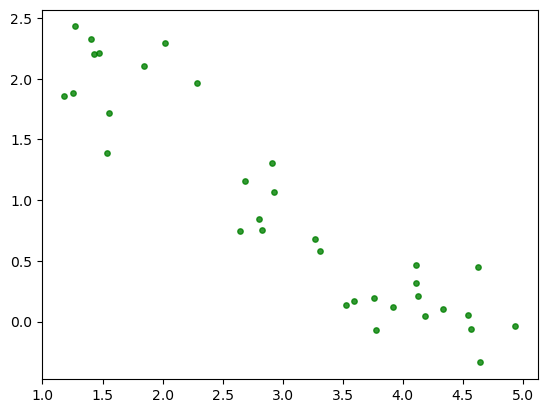

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance

data = pd.read_csv('../../../datasets/3.10_non_linear.csv', sep=',')
data = data[(data.x_train > 1) & (data.x_train < 5)].copy()

# основной график
plt.scatter(data.x_train, data.y_train, 15, 'g', 'o', alpha=0.8, label='data')
plt.show()

In [7]:
def gradient(X, y, w, lambda_reg=0.5):
    # количество обучающих примеров в выборке
    n = X.shape[0]
    # считаем прогноз
    y_hat = X.dot(w.T)
    # вычисляем ошибку прогноза
    error = y - y_hat
    # дальше pointwise перемножение - умножаем каждую из координат на ошибку, после чего добавляем регуляризацию
    grad = np.multiply(X, error).sum(axis=0) + 2 * lambda_reg * w
    grad = grad * (-1.0) * 2.0 / n
    return grad, error

In [8]:
def eval_w_next(X, y, eta, w_current):
    # вычисляем градиент
    grad, error = gradient(X, y, w_current)
    # делаем шаг градиентного спуска
    w_next = w_current - eta*grad
    # проверяем условие сходимости
    weight_evolution = distance.euclidean(w_current.ravel(), w_next.ravel())
    return (w_next, weight_evolution, grad)


def gradient_descent(X: np.array, y: np.array, eta=0.01, epsilon=0.001) -> np.array:
    m = X.shape[1] # количество фичей
    # инициализируем веса
    w = np.random.random(m).reshape(1, -1)
    w_next, weight_evolution, grad = eval_w_next(X, y, eta, w)
    step = 0
    # повторяем до сходимости вектора весов
    while weight_evolution > epsilon:
        w = w_next
        w_next, weight_evolution, grad = eval_w_next(X, y, eta, w)
        step += 1
        if step % 100 ==0:
            print("step %s |w-w_next|=%.5f, grad=%s" % (step, weight_evolution, grad))
    return w


# трансформируем плоский массив X в вектор-столбец
X = data['x_train'].values.reshape(-1, 1)
n = X.shape[0]
# добавляем тривиальный признак w_0, столбец из единиц
X = np.hstack([
    np.ones(n).reshape(-1,1),
    X
])
w = gradient_descent(X, data['y_train'].values.reshape(-1, 1), eta=0.008)

step 100 |w-w_next|=0.00508, grad=[[-0.60995109  0.17620273]]
step 200 |w-w_next|=0.00438, grad=[[-0.52617247  0.15200076]]
step 300 |w-w_next|=0.00378, grad=[[-0.4539011  0.131123 ]]
step 400 |w-w_next|=0.00326, grad=[[-0.39155642  0.11311286]]
step 500 |w-w_next|=0.00281, grad=[[-0.33777496  0.09757647]]
step 600 |w-w_next|=0.00243, grad=[[-0.29138056  0.08417405]]
step 700 |w-w_next|=0.00209, grad=[[-0.25135856  0.07261249]]
step 800 |w-w_next|=0.00181, grad=[[-0.2168337   0.06263894]]
step 900 |w-w_next|=0.00156, grad=[[-0.18705094  0.0540353 ]]
step 1000 |w-w_next|=0.00134, grad=[[-0.16135893  0.04661339]]
step 1100 |w-w_next|=0.00116, grad=[[-0.1391958  0.0402109]]
step 1200 |w-w_next|=0.00100, grad=[[-0.12007684  0.03468781]]


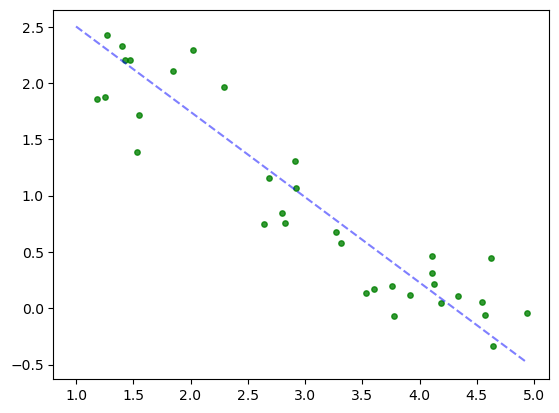

In [9]:
support = np.linspace(X.min(), X.max(), num=100)
# делаем предикт - считаем предсказания модели в каждой точке обучающей выборки в виде y=X*w
y_hat = np.hstack([
    np.ones(support.size).reshape(-1, 1),
    support.reshape(-1, 1)
]).dot(w.T)

# строим график
plt.plot(support, y_hat, 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 15, 'g', 'o', alpha=0.8, label='data')
plt.show()

В этом модуле мы узнали, как  обучать линейную регрессию, не "упираясь" в аппаратные ресурсы: использовать градиентный спуск.
Мы узнали, как детектировать переобучение модели и закрепили свои знания на примере полиномиальной регрессии и выяснили, как увеличить качество решения с помощью механизма регуляризации. Познакомились с двумя видами регуляризации -  Ridge и Lasso.